In [8]:
import chardet
import numpy as np
import scipy as sp
import scipy.constants as constants
import pandas as pd
import matplotlib.pyplot as plt

R = 0.20
mu_0 = constants.mu_0

e = constants.e
m_e = constants.m_e

valorTeorico = e/m_e

print(valorTeorico)
print(mu_0)

n = 154.0

raios = [2, 3, 4, 5]

amp = []
ampPerRadius = []

volt = []
voltPerRadius = []

magneticField = []    
magneticFieldPerRadius = []

for raio in raios:
    with open(f'data/raio{raio}cm.txt', 'rb') as f:
        enc = chardet.detect(f.read())  # or readline if the file is large

    file = pd.read_csv(f'data/raio{raio}cm.txt', header = None, sep='\s+', encoding=enc['encoding'], dtype = np.float64)
    
    for data in [file[0]]:
        amp.append(data)
        B = np.sqrt((4.0/5.0)*(4.0/5.0)*(4.0/5.0)) * ((mu_0 * n * (data))/R)
        magneticField.append(B)
        
    for data in [file[1]]:
        volt.append(data)
        
    magneticFieldPerRadius.append(magneticField)
    ampPerRadius.append(amp)
    voltPerRadius.append(volt)
    
    amp = []
    volt = []
    magneticField = []

#print(ampPerRadius)
#print(voltPerRadius)
#print(magneticFieldPerRadius)

175882001077.2163
1.25663706212e-06


In [9]:
raios = [0.02, 0.03, 0.04, 0.05]

chargePerMassPerRadius = []
chargePerMass = []

for i in range(np.size(voltPerRadius)):
    j = 0
    for volt in voltPerRadius[i]:
        CpM = 2.0*(volt)/(raios[i]*raios[i]*(magneticFieldPerRadius[i][j])*(magneticFieldPerRadius[i][j]))
        chargePerMass.append(CpM)
        j = j + 1
        
    chargePerMassPerRadius.append(chargePerMass)
    chargePerMass = []
    
#print(chargePerMassPerRadius)

c:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


In [10]:
tab = '\t'

raio = []
volts = []
amps = []
mF = []
CpM = []

for i in range(np.size(chargePerMassPerRadius)):
       
       for volt in voltPerRadius[i]:
              for k in range(np.size(volt)):
                     volts.append(volt[k])
                     
       for amp in ampPerRadius[i]:
              for k in range(np.size(amp)):
                     amps.append(amp[k])
              
       for campo in magneticFieldPerRadius[i]:
              for k in range(np.size(campo)):
                     mF.append(campo[k])
              
       for razao in chargePerMassPerRadius[i]:
              for k in range(np.size(razao)):
                     CpM.append(razao[k])
              
       dados = {"voltagens": volts,
       "amperagens": amps,
       "campo": mF,
       "razaoE/M": CpM}
       
       dataFrame = pd.DataFrame(dados)
       
       j = i + 2

       dataFrame.to_csv(f'results/dadosRaio{j}cm.dat', index=False, sep=tab)
       
       volts = []
       amps = []
       mF = []
       CpM = []   

In [11]:
raios = [2, 3, 4, 5]

for raio in raios:
    file = pd.read_csv(f'results/dadosRaio{raio}cm.dat', header = 0, sep='\s+', dtype = np.float64)
    
    media = file['razaoE/M'].mean()
    desvioPadrao = file['razaoE/M'].std()
    
    erroPercentual = (abs(media - valorTeorico)/valorTeorico)*100
    
    resultados = {"mediaE/M": [media],
    "desvioPadraoE/M": [desvioPadrao],
    "erroPercentual": [erroPercentual]}
    
    dataFrame = pd.DataFrame(resultados)
    
    dataFrame.to_csv(f'results/resultadosRaio{raio}cm.dat', index=False, sep=tab)

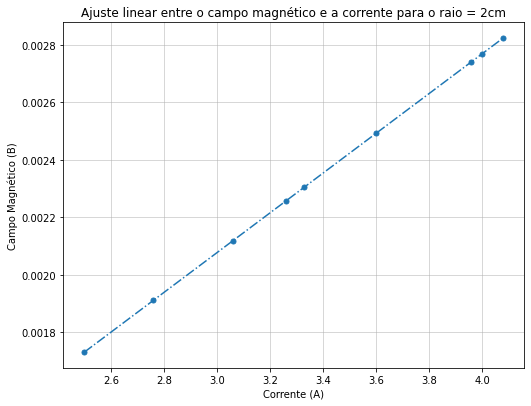

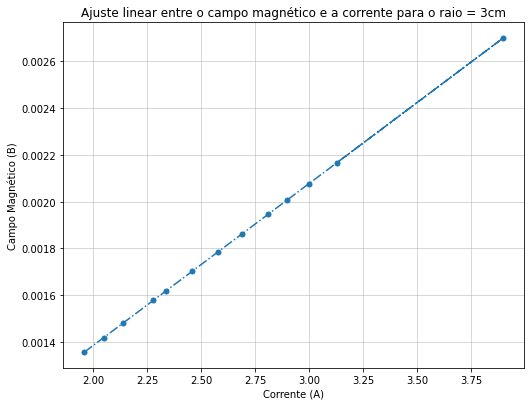

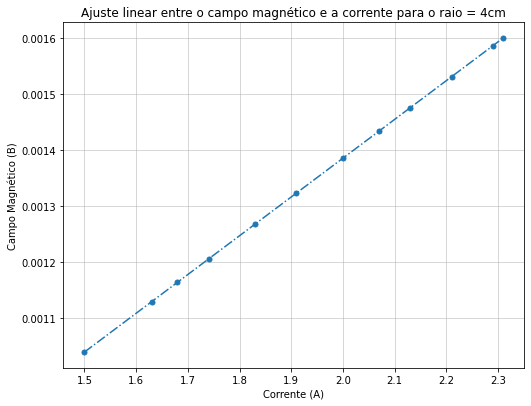

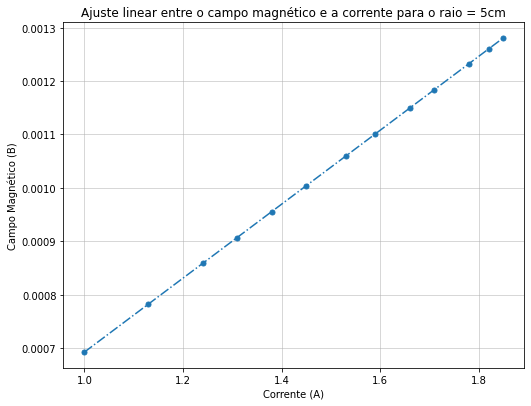

In [19]:
raios = [2, 3, 4, 5]

for raio in raios:
    file = pd.read_csv(f'results/dadosRaio{raio}cm.dat', header = 0, sep='\s+', dtype = np.float64)
    
    fig1 = plt.figure(figsize=(8,6))
    axes = fig1.add_axes([0.1,0.1,0.8,0.8])

    axes.plot(file['amperagens'], file['campo'], ls='-.', marker='o', markersize=5)
    
    axes.set_xlabel('Corrente (A)')
    axes.set_ylabel("Campo Magnético (B)")

    axes.set_title(f'Ajuste linear entre o campo magnético e a corrente para o raio = {raio}cm')
    
    plt.grid(linestyle='-', linewidth=0.5)

    
    plt.savefig(f'ajusteLinearRaio{raio}.png', dpi=400)


Histograma

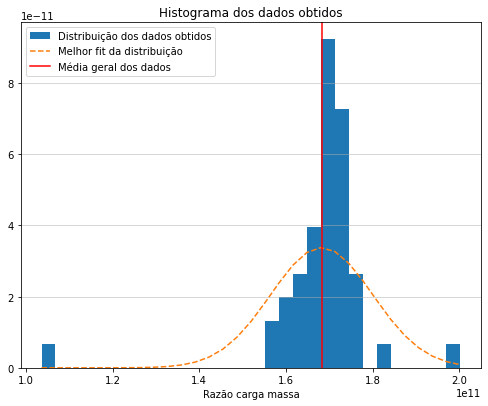

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def histogram(type_hist, data, varname, place):
    
    media = float(data.mean())
    desvioPadrao = float(data.std())
    
    mu = media
    sigma = desvioPadrao
    
    figname = 'hist_%s.png' %place

    fig1 = plt.figure(figsize=(8,6))
    axes = fig1.add_axes([0.1,0.1,0.8,0.8])
    
    n_bins = 30
    bin_size = 5
        
    n, bins, patches = axes.hist(data, bins=n_bins, density=True, color='#1f77b4', label='Distribuição dos dados obtidos')
    
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    
    x_media = media
    
    axes.plot(bins, y, ls='--', color='#ff7f0e', label='Melhor fit da distribuição')
    
    axes.axvline(media, color='r', label='Média geral dos dados')
    
    axes.set_xlabel(varname)

    axes.set_title(f'Histograma dos dados obtidos')

    plt.grid(axis='y', linestyle='-', linewidth=0.5)
    # plt.xlim([min(data)-5, max(data)+5])
    # plt.ylim(0, 100)
    # fig1.tight_layout()
    ax = plt.gca() 
    axes.legend(loc='upper left')
    plt.savefig(figname, dpi=400)
    # plt.close()
    
df = pd.read_csv(f'results/dados.txt', header = 0, sep='\s+', dtype = np.float64)
histogram('fixed_bin_size', df['razaoE/M'], 'Razão carga massa', 'razaoEM')